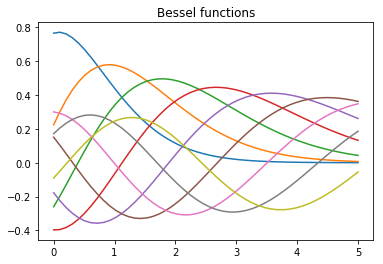

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn
from IPython.display import display, clear_output
import time
x = np.linspace(0,5)
f, ax = plt.subplots()
ax.set_title("Bessel functions")

for n in range(1,10):
    time.sleep(1)
    ax.plot(x, jn(x,n))
    clear_output(wait=True)
    display(f)
plt.close()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
import time
import sys
import string
import datetime
from sklearn import metrics
from sklearn.metrics import mean_squared_error
warnings.simplefilter(action='ignore', category=FutureWarning)
np.set_printoptions(threshold=np.inf)
pd.set_option('display.width',None)

ModuleNotFoundError: No module named 'lightgbm'

In [9]:
train = pd.read_csv(r'C:\Users\Administrator\Desktop\xingfugan\happiness_train_abbr.csv', parse_dates=['survey_time'],encoding='latin-1')
test = pd.read_csv(r'C:\Users\Administrator\Desktop\xingfugan\happiness_test_abbr.csv', parse_dates=['survey_time'],encoding='latin-1')

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability
0,1,4,1,12,32,59,2015-08-04 14:18:00,1,1959,1,...,60000.0,2,2,1,2,3,3,2,4,3
1,2,4,2,18,52,85,2015-07-21 15:04:00,1,1992,1,...,40000.0,3,4,1,2,1,1,1,4,2
2,3,4,2,29,83,126,2015-07-21 13:24:00,2,1967,1,...,8000.0,3,3,1,2,3,2,1,4,2
3,4,5,2,10,28,51,2015-07-25 17:33:00,2,1943,1,...,12000.0,3,3,1,1,7,2,1,3,2
4,5,4,1,7,18,36,2015-08-10 09:50:00,2,1994,1,...,-2.0,4,3,1,1,1,3,2,3,-8


In [10]:
train.head()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability
0,1,4,1,12,32,59,2015-08-04 14:18:00,1,1959,1,...,60000.0,2,2,1,2,3,3,2,4,3
1,2,4,2,18,52,85,2015-07-21 15:04:00,1,1992,1,...,40000.0,3,4,1,2,1,1,1,4,2
2,3,4,2,29,83,126,2015-07-21 13:24:00,2,1967,1,...,8000.0,3,3,1,2,3,2,1,4,2
3,4,5,2,10,28,51,2015-07-25 17:33:00,2,1943,1,...,12000.0,3,3,1,1,7,2,1,3,2
4,5,4,1,7,18,36,2015-08-10 09:50:00,2,1994,1,...,-2.0,4,3,1,1,1,3,2,3,-8


In [11]:
train.shape

(8000, 42)

In [12]:
train.describe()

,id,happiness,survey_type,province,city,county,gender,birth,nationality,religion,...,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.00000,8000.000000,...,7.999000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000
mean,4000.50000,3.850125,1.405500,15.155375,42.564750,70.619000,1.53000,1964.707625,1.37350,0.772250,...,6.776050e+04,2.882500,2.595875,1.063625,1.817125,3.234375,2.226125,1.702500,3.30350,1.094875
std,2309.54541,0.938228,0.491019,8.917100,27.187404,38.747503,0.49913,16.842865,1.52882,1.071459,...,2.909591e+05,1.521835,1.077011,0.789402,0.511825,1.423182,0.971525,0.976147,1.98132,3.410180
min,1.00000,-8.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1921.000000,-8.00000,-8.000000,...,-3.000000e+00,-3.000000,-8.000000,-3.000000,-8.000000,1.000000,-8.000000,-8.000000,-8.00000,-8.000000
25%,2000.75000,4.000000,1.000000,7.000000,18.000000,37.000000,1.00000,1952.000000,1.00000,1.000000,...,1.300000e+04,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,3.00000,2.000000
50%,4000.50000,4.000000,1.000000,15.000000,42.000000,73.000000,2.00000,1965.000000,1.00000,1.000000,...,3.800000e+04,3.000000,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000,4.00000,2.000000
75%,6000.25000,4.000000,2.000000,22.000000,65.000000,104.000000,2.00000,1977.000000,1.00000,1.000000,...,7.000000e+04,4.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,4.00000,3.000000
max,8000.00000,5.000000,2.000000,31.000000,89.000000,134.000000,2.00000,1997.000000,8.00000,1.000000,...,9.999992e+06,50.000000,5.000000,30.000000,2.000000,7.000000,3.000000,3.000000,5.00000,4.000000


In [13]:
'''检查是否具有缺失数据'''
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        # written by MJ Bahmani
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)
# 判断是否包含缺失值
print(check_missing_data(train))

            id happiness survey_type province   city county     survey_time  \
Total        0         0           0        0      0      0               0   
Percent      0         0           0        0      0      0               0   
Types    int64     int64       int64    int64  int64  int64  datetime64[ns]   

        gender  birth nationality     ...     family_income family_m  \
Total        0      0           0     ...                 1        0   
Percent      0      0           0     ...          1.25e-06        0   
Types    int64  int64       int64     ...           float64    int64   

        family_status  house    car marital status_peer status_3_before  \
Total               0      0      0       0           0               0   
Percent             0      0      0       0           0               0   
Types           int64  int64  int64   int64       int64           int64   

          view inc_ability  
Total        0           0  
Percent      0           0  
Types 

In [14]:
train['survey_time'][:5]

0   2015-08-04 14:18:00
1   2015-07-21 15:04:00
2   2015-07-21 13:24:00
3   2015-07-25 17:33:00
4   2015-08-10 09:50:00
Name: survey_time, dtype: datetime64[ns]

In [15]:
train['birth'][:5]

0    1959
1    1992
2    1967
3    1943
4    1994
Name: birth, dtype: int64

In [16]:
train.isnull().sum()

id                    0
happiness             0
survey_type           0
province              0
city                  0
county                0
survey_time           0
gender                0
birth                 0
nationality           0
religion              0
religion_freq         0
edu                   0
income                0
political             0
floor_area            0
height_cm             0
weight_jin            0
health                0
health_problem        0
depression            0
hukou                 0
socialize             0
relax                 0
learn                 0
equity                0
class                 0
work_exper            0
work_status        5049
work_yr            5049
work_type          5049
work_manage        5049
family_income         1
family_m              0
family_status         0
house                 0
car                   0
marital               0
status_peer           0
status_3_before       0
view                  0
inc_ability     

In [17]:
train = train.loc[train['happiness'] != -8]

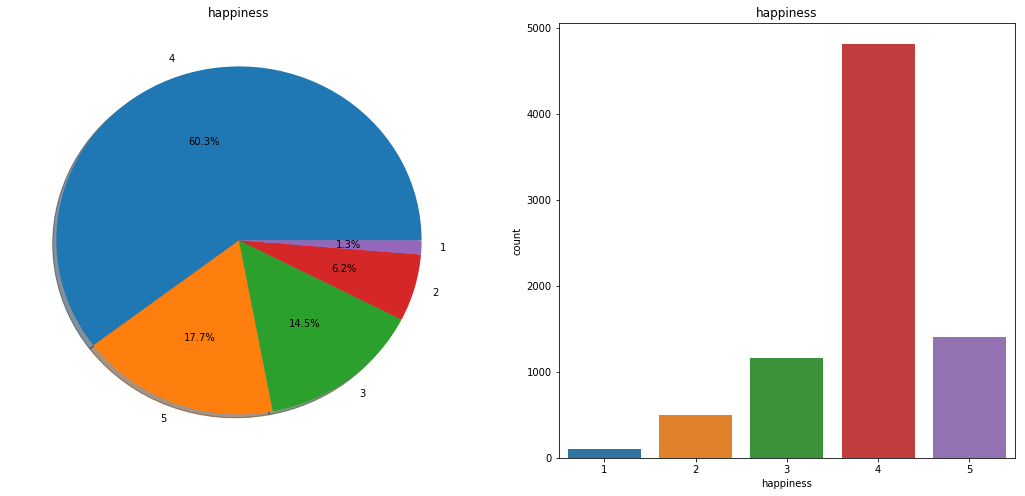

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['happiness'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('happiness')
ax[0].set_ylabel('')
sns.countplot('happiness',data=train,ax=ax[1])
ax[1].set_title('happiness')
plt.show()

In [19]:
train.groupby(['gender','happiness'])['happiness'].count()

gender  happiness
1       1              43
        2             216
        3             588
        4            2306
        5             599
2       1              61
        2             281
        3             571
        4            2512
        5             811
Name: happiness, dtype: int64

Text(0.5,1,'Sex:happiness')

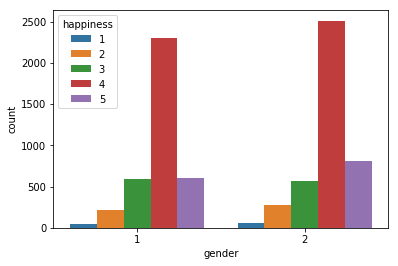

In [20]:
sns.countplot('gender',hue='happiness',data=train)
ax[1].set_title('Sex:happiness')

In [21]:
train['survey_time'] = train['survey_time'].dt.year
test['survey_time'] = test['survey_time'].dt.year

In [22]:
test.head()

,id,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,...,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability
0,8001,1,2,2,9,2015,2,1972,8,0,...,-2,5,3,1,2,3,3,1,4,2
1,8002,1,22,66,106,2015,2,1938,1,1,...,20000,1,1,2,2,7,3,3,4,2
2,8003,2,9,22,44,2015,2,1935,1,1,...,-2,1,2,1,2,7,3,1,3,4
3,8004,2,18,52,86,2015,2,1992,1,1,...,100000,2,4,1,2,3,2,1,3,2
4,8005,2,24,70,110,2015,1,1990,1,1,...,30000,3,2,1,2,1,2,2,5,2


In [23]:
train['Age']=train['survey_time']-train['birth']
test['Age']=test['survey_time']-test['birth']
print(train['Age'])
del_list=['survey_time','birth']

0       56
1       23
2       48
3       72
4       21
5       69
6       52
7       56
8       63
9       30
10      27
11      47
12      51
13      76
14      80
15      32
16      41
17      53
18      39
19      50
20      64
21      67
22      35
23      73
24      59
25      45
26      49
27      52
28      23
29      68
        ..
7970    57
7971    20
7972    38
7973    39
7974    50
7975    43
7976    62
7977    67
7978    39
7979    31
7980    61
7981    69
7982    46
7983    62
7984    80
7985    45
7986    40
7987    52
7988    54
7989    84
7990    25
7991    43
7992    49
7993    61
7994    40
7995    34
7996    70
7997    48
7998    37
7999    24
Name: Age, Length: 7988, dtype: int64


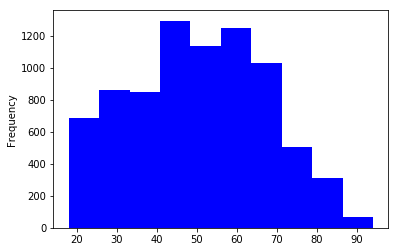

In [24]:
figure,ax = plt.subplots(1,1)
train['Age'].plot.hist(ax=ax,color='blue')

In [25]:
combine=[train,test]

In [26]:
for dataset in combine:
    dataset.loc[dataset['Age']<=16,'Age']=0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 64) & (dataset['Age'] <= 80), 'Age'] = 4
    dataset.loc[ dataset['Age'] > 80, 'Age'] = 5

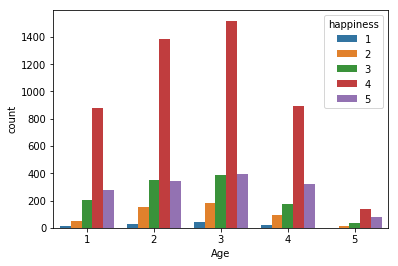

In [27]:
sns.countplot('Age',hue='happiness',data=train)

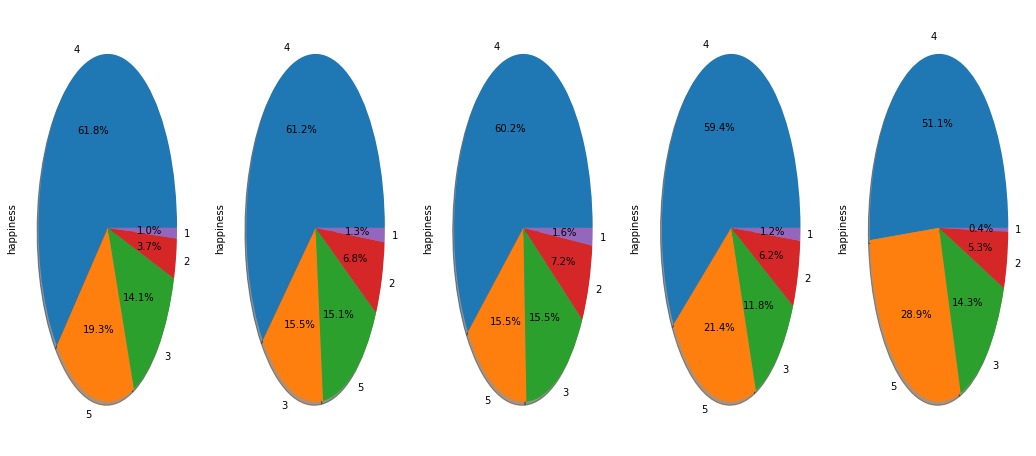

In [28]:
figure1,ax1 = plt.subplots(1,5,figsize=(18,8))
train['happiness'][train['Age']==1].value_counts().plot.pie(autopct='%1.1f%%',ax=ax1[0],shadow=True)
train['happiness'][train['Age']==2].value_counts().plot.pie(autopct='%1.1f%%',ax=ax1[1],shadow=True)
train['happiness'][train['Age']==3].value_counts().plot.pie(autopct='%1.1f%%',ax=ax1[2],shadow=True)
train['happiness'][train['Age']==4].value_counts().plot.pie(autopct='%1.1f%%',ax=ax1[3],shadow=True)
train['happiness'][train['Age']==5].value_counts().plot.pie(autopct='%1.1f%%',ax=ax1[4],shadow=True)

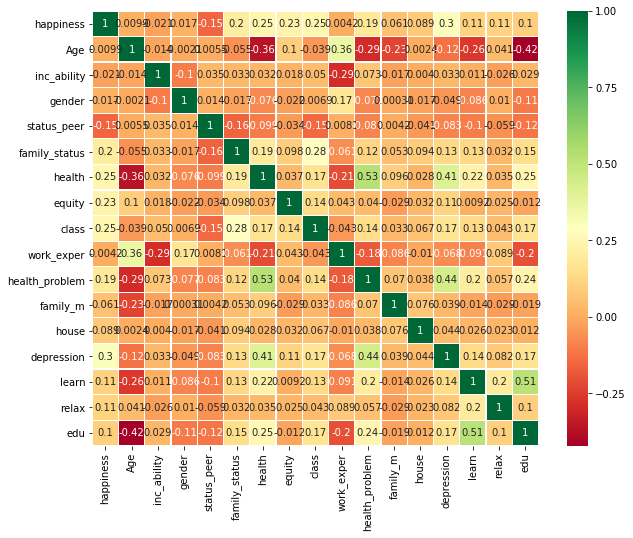

In [29]:
sns.heatmap(train[['happiness','Age','inc_ability','gender','status_peer','family_status','health','equity','class','work_exper','health_problem','family_m','house','depression','learn','relax','edu']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

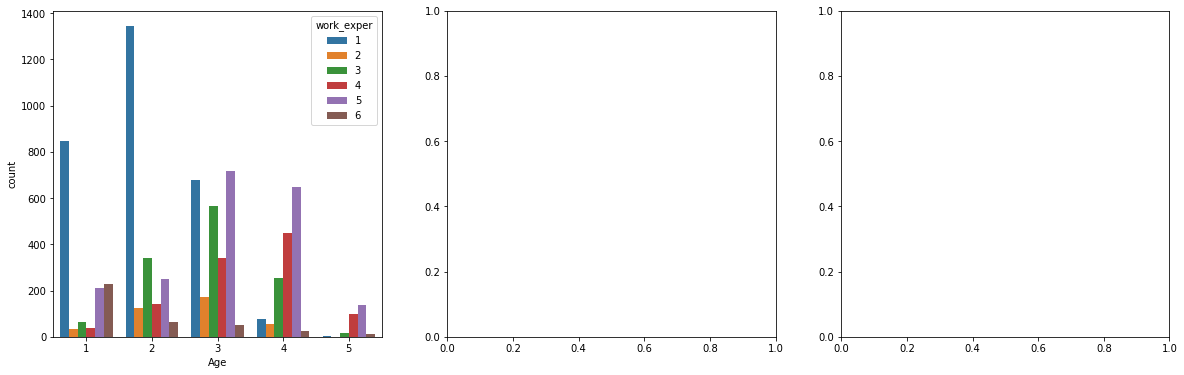

In [30]:
figure,ax = plt.subplots(1,3,figsize=(20,6))
sns.countplot('Age',hue='work_exper',ax = ax[0],data=train)


In [31]:
features=['Age','inc_ability','gender','status_peer','work_exper','family_status','health','equity','class','health_problem','family_m','house','depression','learn','relax','edu']

In [32]:
target = train['happiness']
train = train[features]
test = test[features]
feature_importance_df = pd.DataFrame()
oof = np.zeros(len(train))
predictions = np.zeros(len(test))

In [33]:
params = {'num_leaves': 9,
         'min_data_in_leaf': 40,
         'objective': 'regression',
         'max_depth': 16,
         'learning_rate': 0.01,
         'boosting': 'gbdt',
         'bagging_freq': 5,
         'bagging_fraction': 0.8,   # 每次迭代时用的数据比例
         'feature_fraction': 0.8201,# 每次迭代中随机选择80％的参数来建树
         'bagging_seed': 11,
         'reg_alpha': 1.728910519108444,
         'reg_lambda': 4.9847051755586085,
         'random_state': 42,
         'metric': 'rmse',
         'verbosity': -1,
         'subsample': 0.81,
         'min_gain_to_split': 0.01077313523861969,
         'min_child_weight': 19.428902804238373,
         'num_threads': 4}

NameError: name 'KFold' is not defined

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
import time
import sys
import string
import datetime
from sklearn import metrics
from sklearn.metrics import mean_squared_error
warnings.simplefilter(action='ignore', category=FutureWarning)
np.set_printoptions(threshold=np.inf)
pd.set_option('display.width',None)


In [37]:
kfolds = KFold(n_splits=5,shuffle=True,random_state=15)
for fold_n,(trn_index,val_index) in enumerate(kfolds.split(train,target)):
    print("fold_n {}".format(fold_n))
    trn_data = lgb.Dataset(train.iloc[trn_index],label=target.iloc[trn_index])
    val_data = lgb.Dataset(train.iloc[val_index],label=target.iloc[val_index])
    num_round=10000
    clf = lgb.train(params, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 100)
    oof[val_index] = clf.predict(train.iloc[val_index], num_iteration=clf.best_iteration)
    predictions += clf.predict(test,num_iteration=clf.best_iteration)/5
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_n + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print("CV score: {:<8.5f}".format(mean_squared_error(target, oof)**0.5))

fold_n 0
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[850]	training's rmse: 0.662766	valid_1's rmse: 0.691748
CV score: 3.55007 
fold_n 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[673]	training's rmse: 0.665057	valid_1's rmse: 0.700575
CV score: 3.10422 
fold_n 2
Training until validation scores don't improve for 100 rounds.
[1000]	training's rmse: 0.666047	valid_1's rmse: 0.663433
Early stopping, best iteration is:
[978]	training's rmse: 0.666542	valid_1's rmse: 0.663286
CV score: 2.56078 
fold_n 3
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[735]	training's rmse: 0.661632	valid_1's rmse: 0.710492
CV score: 1.87508 
fold_n 4
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[790]	training's rmse: 0.662837	valid_1's rmse: 0.696739
CV score: 0.69275 


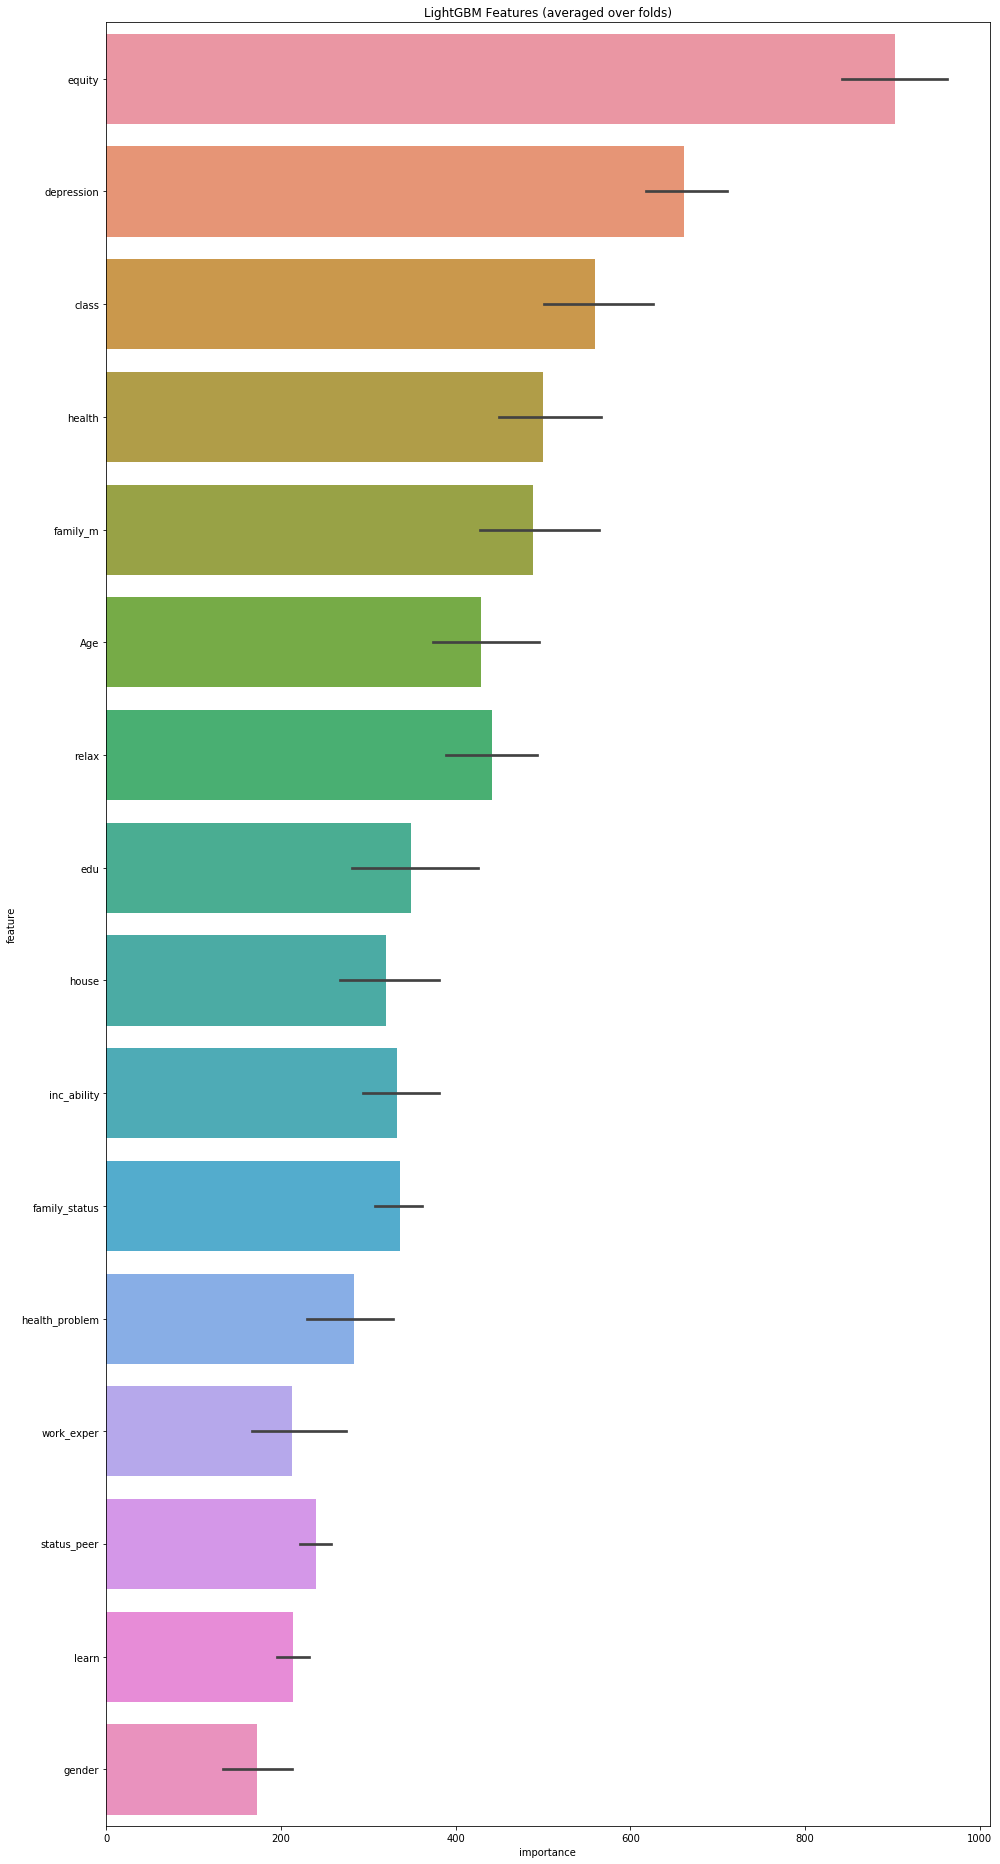

In [38]:
cols = (feature_importance_df[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:1000].index)
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,26))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features (averaged over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')

In [42]:
test = pd.read_csv(r'C:\Users\Administrator\Desktop\xingfugan\happiness_test_abbr.csv', parse_dates=['survey_time'],encoding='latin-1')
submision_lgb1  = pd.DataFrame({"id":test['id'].values})
submision_lgb1["happiness"]=predictions
submision_lgb1.to_csv(r"C:\Users\Administrator\Desktop\xingfugan\submision_lgb1.csv",index=False)